In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ds = pd.read_excel("HousePricePrediction.xlsx")

# Printing first 5 records of the dataset
print(ds.head(5))


   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [7]:
ds.shape

(2919, 13)

In [9]:
obj = (ds.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (ds.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (ds.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 4
Integer variables: 0
Float variables: 3


In [11]:
# Select only numerical features for correlation analysis
numerical_dataset = ds.select_dtypes(include=['number'])
correlation=numerical_dataset.corr()
print(correlation['SalePrice'].sort_values(ascending=False),'\n')

SalePrice       1.000000
TotalBsmtSF     0.613581
YearBuilt       0.522897
YearRemodAdd    0.507101
LotArea         0.263843
BsmtFinSF2     -0.011378
Id             -0.021917
OverallCond    -0.077856
MSSubClass     -0.084284
Name: SalePrice, dtype: float64 



#Understanding the Correlation Coefficients:
>A correlation coefficient measures the strength and direction of a linear relationship between two variables. 
>In this case, we're looking at the correlation between SalePrice and other numerical features.   

**Interpreting the Results:**
>Positive Correlation:
>
>TotalBsmtSF (0.613581): A strong positive correlation indicates that as the total square footage of the basement increases, the sale price tends to increase.
>YearBuilt (0.522897) and YearRemodAdd (0.507101): Newer houses and those recently remodeled tend to have higher prices.
LotArea (0.263843): Larger lot sizes are generally associated with higher property values.

>Negative Correlation:
>
>MSSubClass (-0.084284) and OverallCond (-0.077856): Certain types of dwellings (represented by MSSubClass) and lower overall condition ratings might be associated with lower prices.
>Id (-0.021917) and BsmtFinSF2 (-0.011378): These features have very weak negative correlations with SalePrice, indicating minimal impact.
Key Takeaways:

>Feature Importance: Features with higher correlation coefficients (both positive and negative) are likely to be more important predictors of SalePrice.
Model Building: These correlations can be used to select relevant features for your machine learning model.
>Remember: Correlation does not imply causation. While these features are correlated with SalePrice, other factors might also influence house prices.

>By understanding these correlations, you can build a more accurate and robust house price prediction model.

<Axes: >

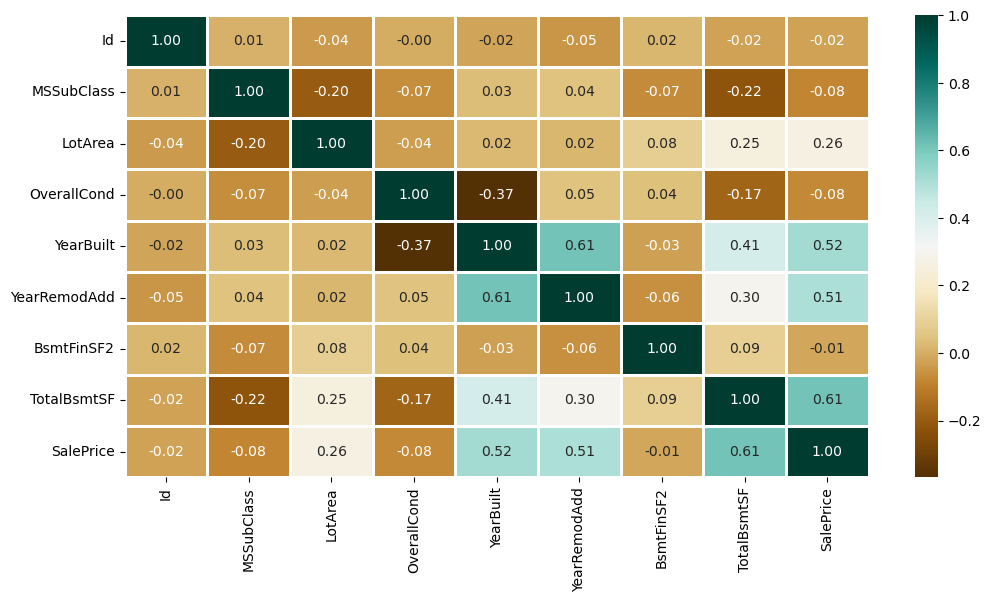

In [13]:
# Select only numerical features for correlation analysis
numerical_dataset = ds.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

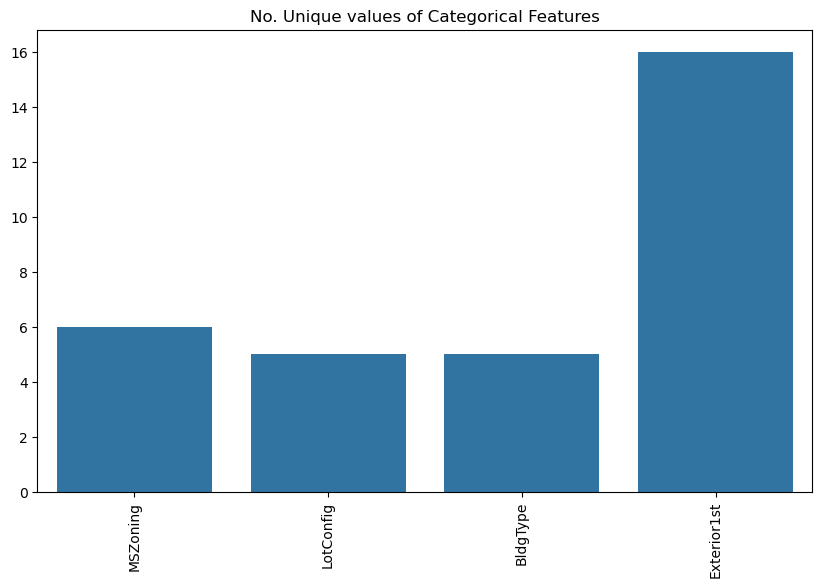

In [15]:
unique_values = []
for col in object_cols:
  unique_values.append(ds[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

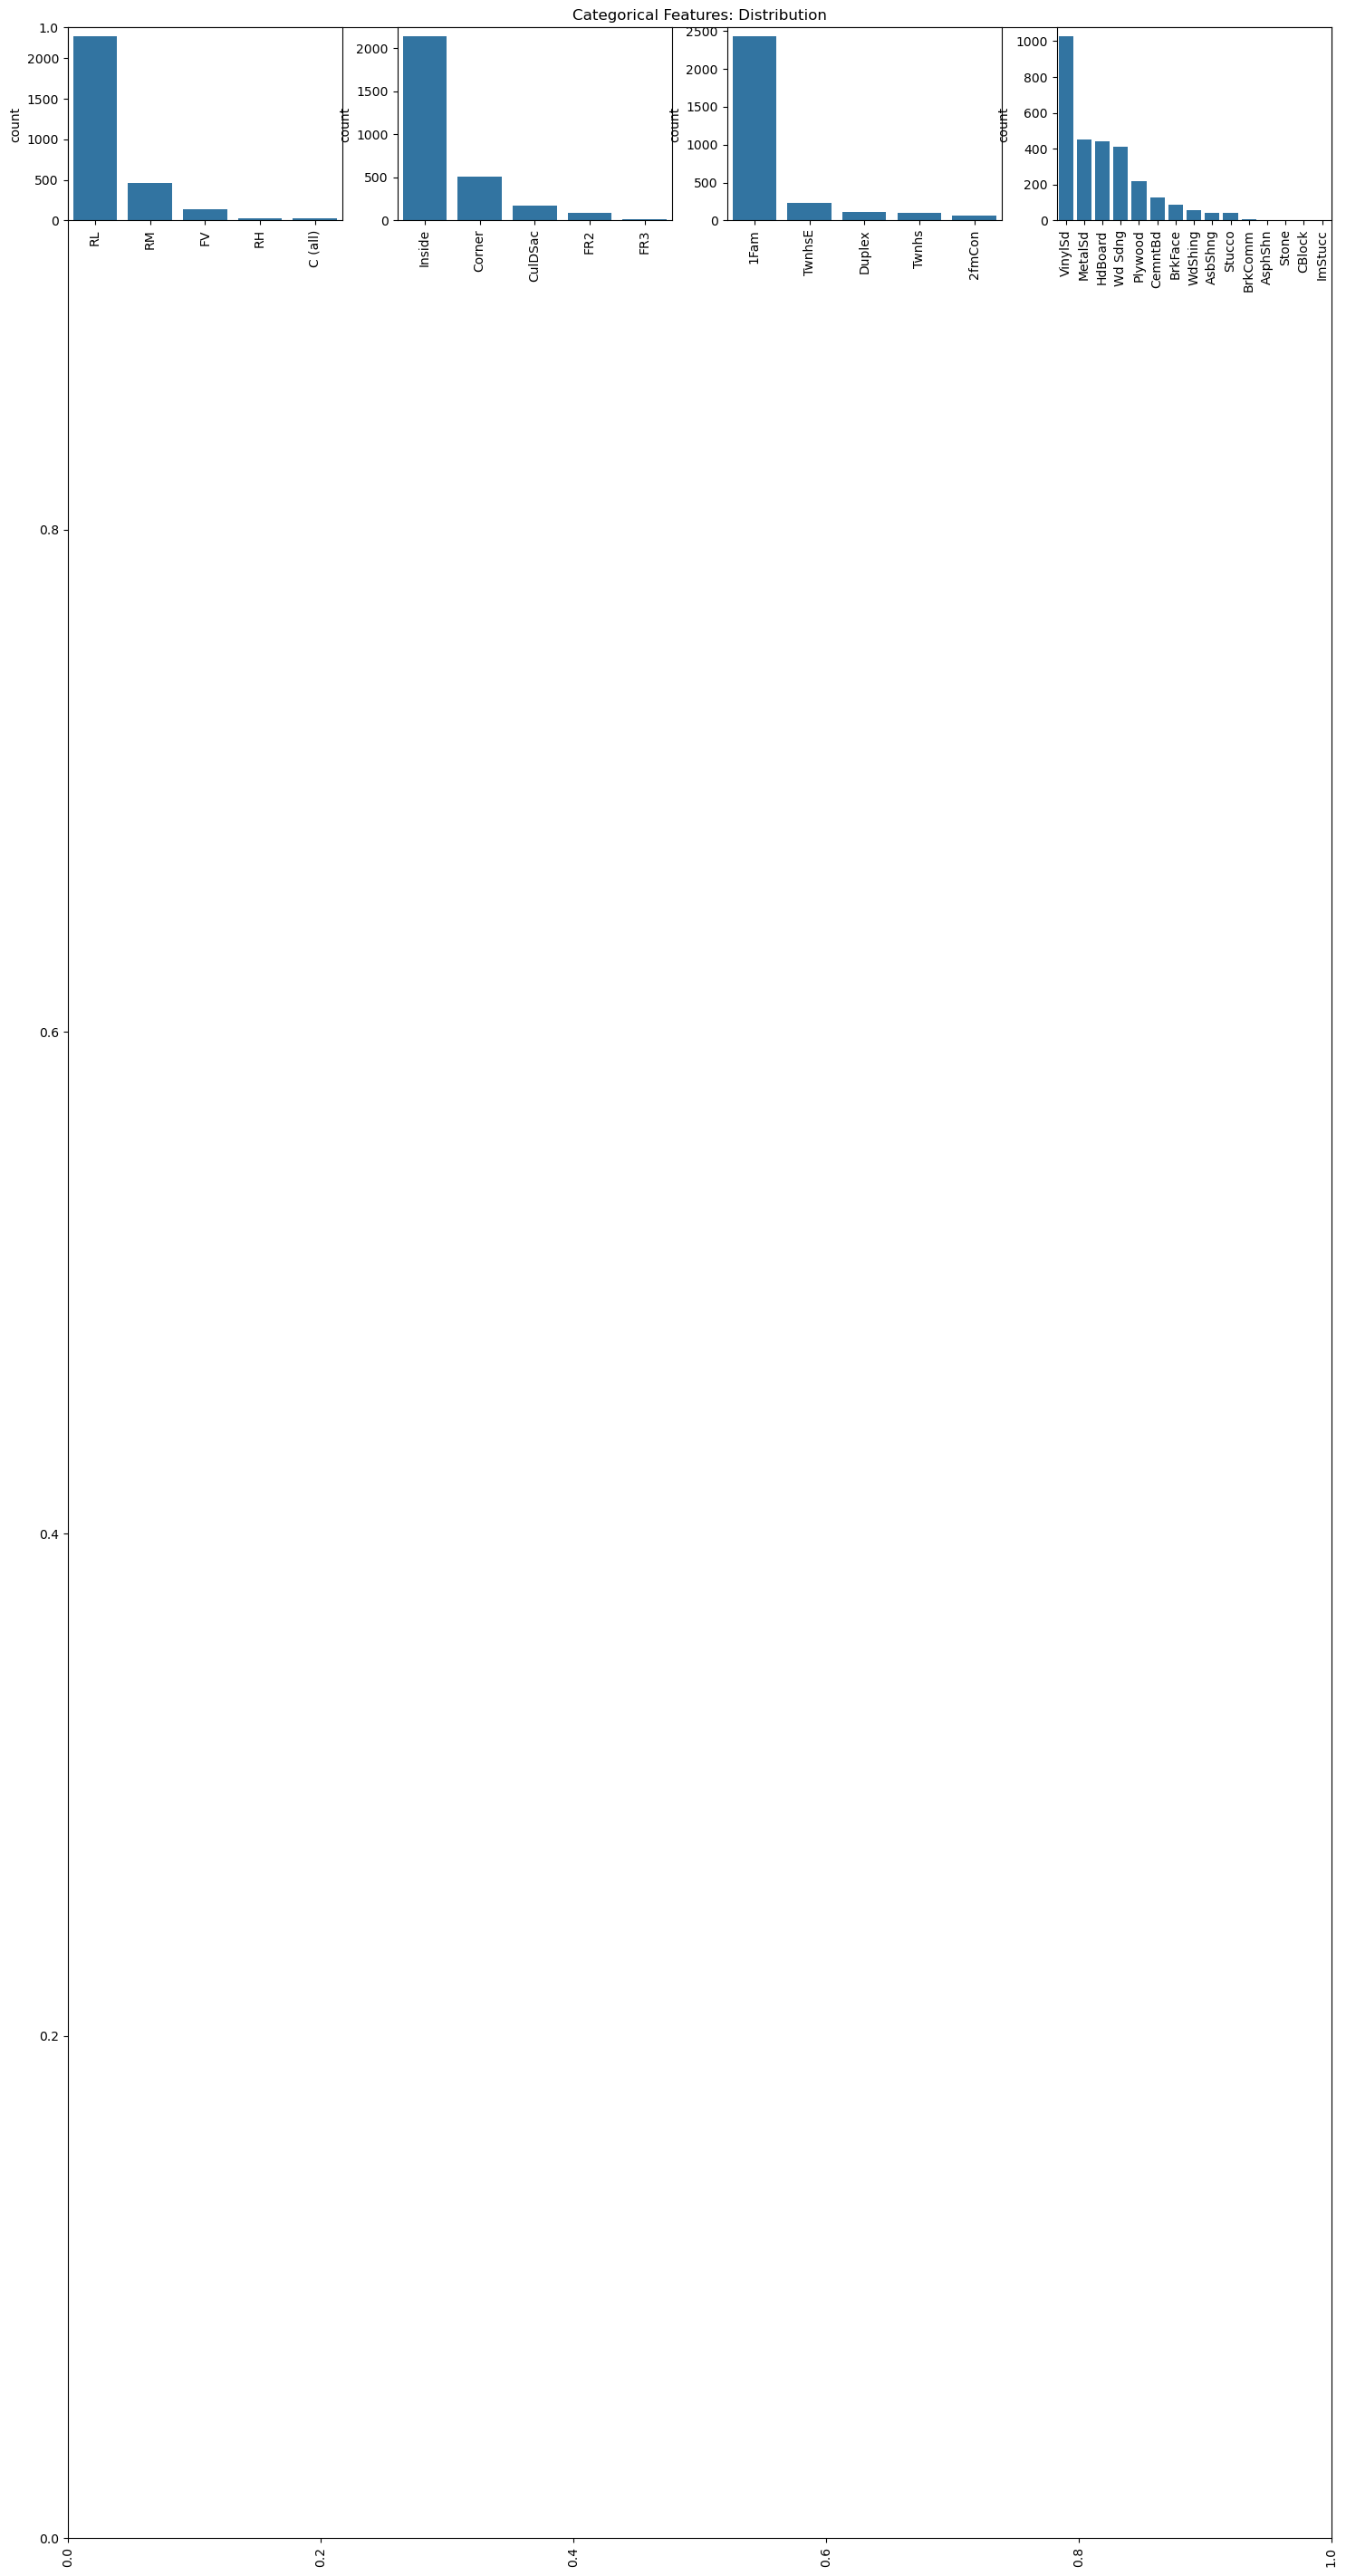

In [71]:
plt.figure(figsize=(18,36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
	y = ds[col].value_counts()
	plt.subplot(11, 4, index)
	plt.xticks(rotation=90)
	sns.barplot(x=list(y.index), y=y)
	index += 1


In [33]:
ds.drop(['Id'],axis=1,inplace=True)

KeyError: "['Id'] not found in axis"

In [35]:
ds['SalePrice'] = ds['SalePrice'].fillna(
ds['SalePrice'].mean())

In [37]:
new_dataset = ds.dropna()

In [39]:
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [41]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
	len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [43]:
from sklearn.preprocessing import OneHotEncoder

# Assuming 'new_dataset' is your DataFrame and 'object_cols' is a list of categorical column names
# Create a OneHotEncoder instance
encoder = OneHotEncoder(handle_unknown='ignore')
# Fit and transform the categorical features
encoded_features = encoder.fit_transform(new_dataset[object_cols])
# Convert the sparse matrix to a dense NumPy array
encoded_features = encoded_features.toarray()
# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())
# Concatenate the encoded features with the original DataFrame
df_final = pd.concat([new_dataset.drop(object_cols, axis=1), encoded_df], axis=1)
print(df_final.head())

   MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
0        60.0   8450.0          5.0     2003.0        2003.0         0.0   
1        20.0   9600.0          8.0     1976.0        1976.0         0.0   
2        60.0  11250.0          5.0     2001.0        2002.0         0.0   
3        70.0   9550.0          5.0     1915.0        1970.0         0.0   
4        60.0  14260.0          5.0     2000.0        2000.0         0.0   

   TotalBsmtSF  SalePrice  MSZoning_C (all)  MSZoning_FV  ...  \
0        856.0   208500.0               0.0          0.0  ...   
1       1262.0   181500.0               0.0          0.0  ...   
2        920.0   223500.0               0.0          0.0  ...   
3        756.0   140000.0               0.0          0.0  ...   
4       1145.0   250000.0               0.0          0.0  ...   

   Exterior1st_CemntBd  Exterior1st_HdBoard  Exterior1st_ImStucc  \
0                  0.0                  0.0                  0.0   
1               

In [47]:
df_final.isnull().sum()

MSSubClass             6
LotArea                6
OverallCond            6
YearBuilt              6
YearRemodAdd           6
BsmtFinSF2             6
TotalBsmtSF            6
SalePrice              6
MSZoning_C (all)       6
MSZoning_FV            6
MSZoning_RH            6
MSZoning_RL            6
MSZoning_RM            6
LotConfig_Corner       6
LotConfig_CulDSac      6
LotConfig_FR2          6
LotConfig_FR3          6
LotConfig_Inside       6
BldgType_1Fam          6
BldgType_2fmCon        6
BldgType_Duplex        6
BldgType_Twnhs         6
BldgType_TwnhsE        6
Exterior1st_AsbShng    6
Exterior1st_AsphShn    6
Exterior1st_BrkComm    6
Exterior1st_BrkFace    6
Exterior1st_CBlock     6
Exterior1st_CemntBd    6
Exterior1st_HdBoard    6
Exterior1st_ImStucc    6
Exterior1st_MetalSd    6
Exterior1st_Plywood    6
Exterior1st_Stone      6
Exterior1st_Stucco     6
Exterior1st_VinylSd    6
Exterior1st_Wd Sdng    6
Exterior1st_WdShing    6
dtype: int64

In [49]:
df_final = df_final.dropna()

In [51]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [53]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.17482383757598022


In [55]:
for i in range(len(Y_pred)):
    print(f"Predicted Price: {Y_pred[i]}, Actual Price: {Y_valid.iloc[i]}")

Predicted Price: 180921.15965506568, Actual Price: 118500.0
Predicted Price: 180921.06785290214, Actual Price: 180921.19589041095
Predicted Price: 180921.1275024803, Actual Price: 151000.0
Predicted Price: 180921.11786137737, Actual Price: 180921.19589041095
Predicted Price: 180921.1729266727, Actual Price: 193500.0
Predicted Price: 180921.11247909963, Actual Price: 96500.0
Predicted Price: 180921.30376444987, Actual Price: 314813.0
Predicted Price: 180921.16199132564, Actual Price: 180921.19589041095
Predicted Price: 180921.10060788417, Actual Price: 180921.19589041095
Predicted Price: 180921.17299983, Actual Price: 184900.0
Predicted Price: 180921.06719334837, Actual Price: 187000.0
Predicted Price: 180921.1801698849, Actual Price: 225000.0
Predicted Price: 180921.29029894498, Actual Price: 180921.19589041095
Predicted Price: 180921.1751705629, Actual Price: 146800.0
Predicted Price: 180921.15205572158, Actual Price: 180000.0
Predicted Price: 180921.1869729917, Actual Price: 193000.0

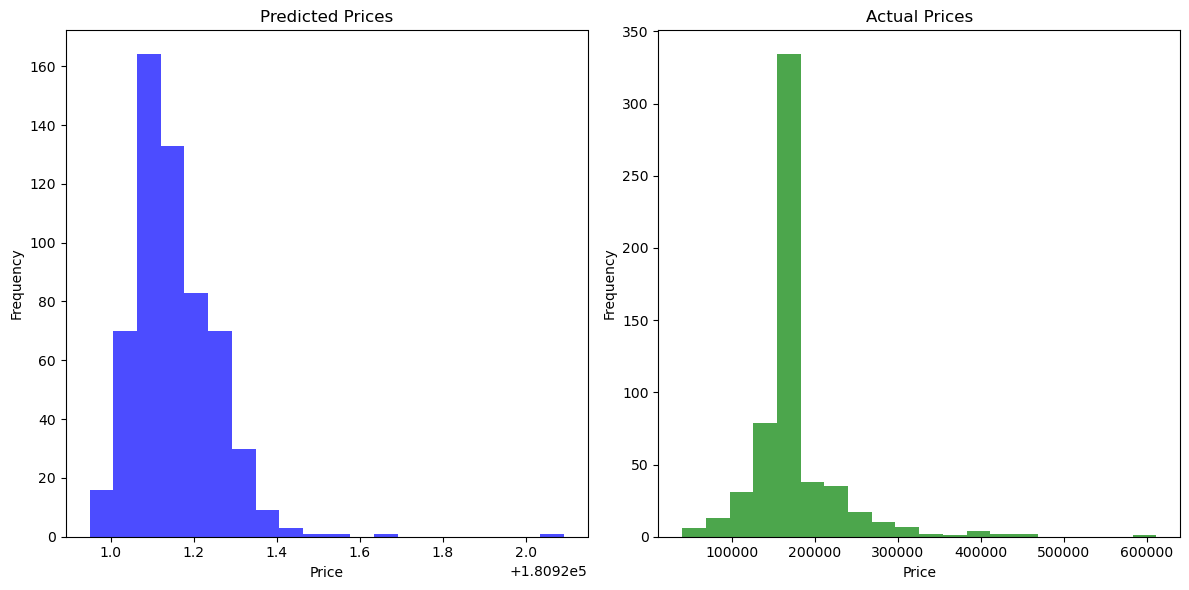

In [57]:
import matplotlib.pyplot as plt

# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the histogram of predicted prices
axs[0].hist(Y_pred, bins=20, color='blue', alpha=0.7)
axs[0].set_title('Predicted Prices')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Frequency')

# Plot the histogram of actual prices
axs[1].hist(Y_valid, bins=20, color='green', alpha=0.7)
axs[1].set_title('Actual Prices')
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [75]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)

0.18941881746777714

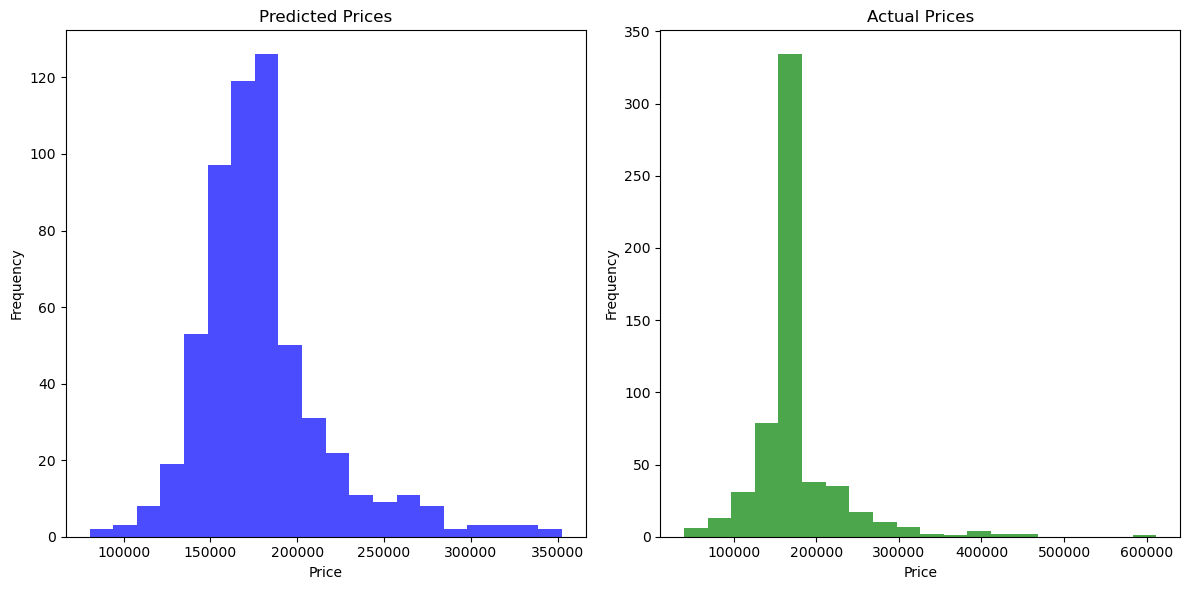

In [77]:
# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the histogram of predicted prices
axs[0].hist(Y_pred, bins=20, color='blue', alpha=0.7)
axs[0].set_title('Predicted Prices')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Frequency')

# Plot the histogram of actual prices
axs[1].hist(Y_valid, bins=20, color='green', alpha=0.7)
axs[1].set_title('Actual Prices')
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [61]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.18552005588945578


In [71]:
pip install catboost


   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB 65.4 kB/s eta 0:25:55
   ---------------------------------------- 0.0/101.7 MB 65.4 kB/s e

In [79]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

cb_model = CatBoostRegressor()
cb_model.fit(X_train, Y_train)
preds = cb_model.predict(X_valid)

cb_r2_score=r2_score(Y_valid, preds)
cb_r2_score

Learning rate set to 0.046782
0:	learn: 56364.5589292	total: 13.9ms	remaining: 13.9s
1:	learn: 55640.8430047	total: 36.6ms	remaining: 18.3s
2:	learn: 54907.3442101	total: 46ms	remaining: 15.3s
3:	learn: 54241.6283781	total: 55.9ms	remaining: 13.9s
4:	learn: 53645.6290416	total: 62ms	remaining: 12.3s
5:	learn: 53058.9040824	total: 67.9ms	remaining: 11.2s
6:	learn: 52600.8485541	total: 73.4ms	remaining: 10.4s
7:	learn: 52150.3778900	total: 78.9ms	remaining: 9.79s
8:	learn: 51683.4681514	total: 84ms	remaining: 9.25s
9:	learn: 51123.5752568	total: 89.3ms	remaining: 8.84s
10:	learn: 50587.7236644	total: 94.5ms	remaining: 8.49s
11:	learn: 50109.8383335	total: 101ms	remaining: 8.29s
12:	learn: 49691.2384562	total: 106ms	remaining: 8.03s
13:	learn: 49249.2162591	total: 111ms	remaining: 7.81s
14:	learn: 48892.6403061	total: 116ms	remaining: 7.61s
15:	learn: 48474.6857206	total: 121ms	remaining: 7.43s
16:	learn: 48146.4194221	total: 126ms	remaining: 7.27s
17:	learn: 47849.0418711	total: 131ms	re

0.25613395502017766

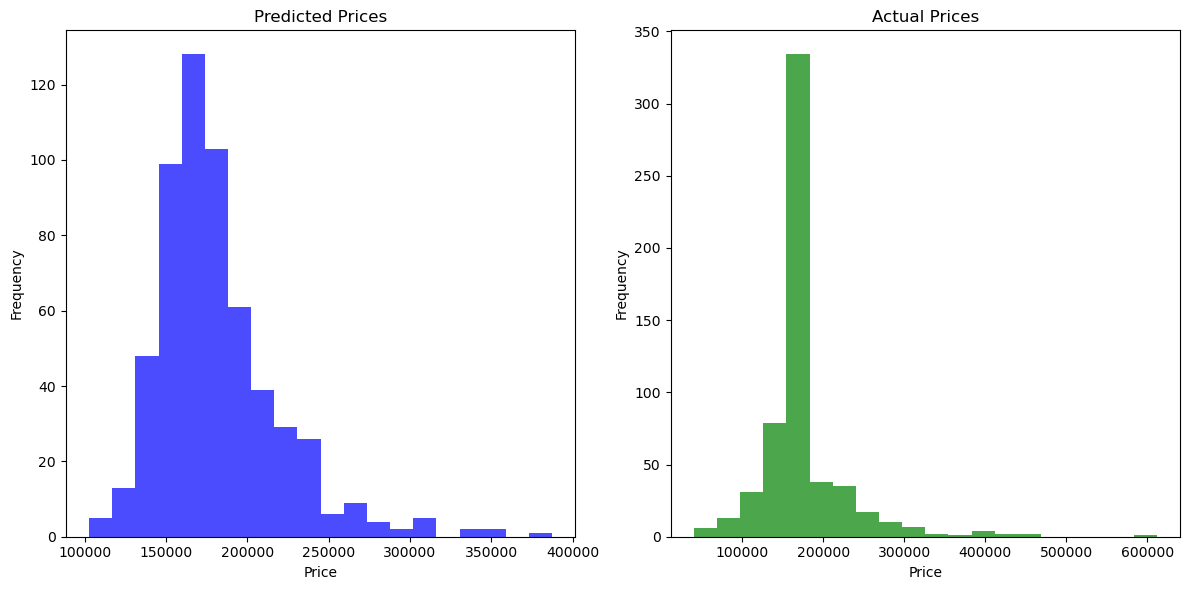

In [83]:
# Create a figure and axes
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the histogram of predicted prices
axs[0].hist(preds, bins=20, color='blue', alpha=0.7)
axs[0].set_title('Predicted Prices')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Frequency')

# Plot the histogram of actual prices
axs[1].hist(Y_valid, bins=20, color='green', alpha=0.7)
axs[1].set_title('Actual Prices')
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()